In [20]:
import cv2
from PIL import Image
import ipyplot
from IPython.display import display


In [34]:
image = cv2.imread('images/Truck-linescan-AU-R-1000px.jpg')
height, width = image.shape[:2]

In [35]:
division_width = int(width/5)

In [36]:
for i in range(5):
    crop_image = image[0:height, division_width*i:division_width*(i+1)]
    cv2.imwrite(f'images/4/{i+1}.jpg', crop_image)

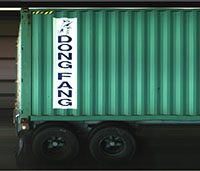

In [37]:
crop_image = image[0:height, 0:division_width]
Image.fromarray(cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB))

In [10]:
import glob
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [27]:
path_image = glob.glob('images/1/*.jpg')
path_image

['images/1/1.jpg',
 'images/1/2.jpg',
 'images/1/3.jpg',
 'images/1/4.jpg',
 'images/1/5.jpg']

In [22]:
import numpy as np
from PIL import Image

def merge_images_horizontally(imgs):
    '''
    This function merges images horizontally.
    '''
    #create two lists - one for heights and one for widths
    widths, heights = zip(*(i.size for i in imgs))
    width_of_new_image = sum(widths)
    height_of_new_image = min(heights) #take minimum height
    # create new image
    new_im = Image.new('RGB', (width_of_new_image, height_of_new_image))
    new_pos = 0
    for im in imgs:
        new_im.paste(im, (new_pos,0))
        new_pos += im.size[0] #position for the next image
    filename = './result.jpg'
    new_im.save(filename) #change the filename if you want
    return filename

In [ ]:
def get_concat_h_multi_resize(im_list, resample=Image.BICUBIC):
    min_height = min(im.height for im in im_list)
    im_list_resize = [im.resize((int(im.width * min_height / im.height), min_height),resample=resample)
                      for im in im_list]
    total_width = sum(im.width for im in im_list_resize)
    dst = Image.new('RGB', (total_width, min_height))
    pos_x = 0
    for im in im_list_resize:
        dst.paste(im, (pos_x, 0))
        pos_x += im.width
    return dst


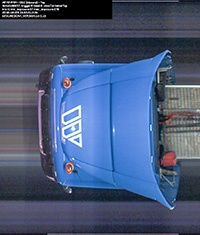
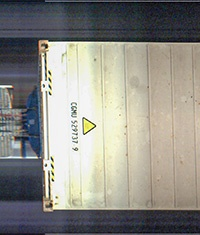
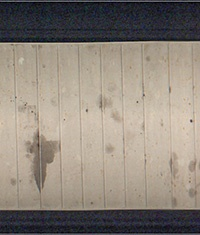
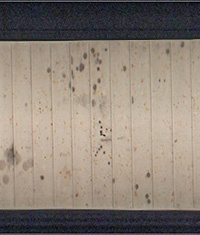
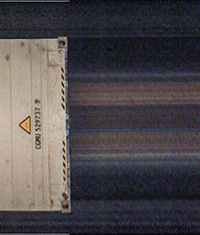


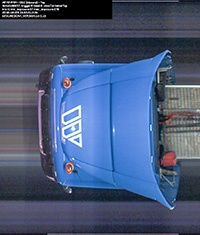
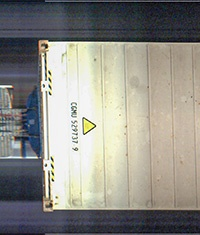
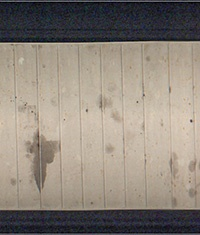
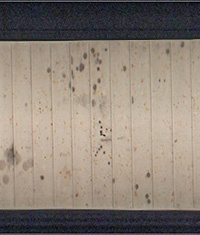
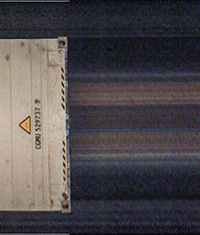

In [29]:
path_image = glob.glob('images/3/*.jpg')
images = []
for img_path in path_image:
    images.append(mpimg.imread(img_path))

ipyplot.plot_images(images, max_images=20, img_width=150)


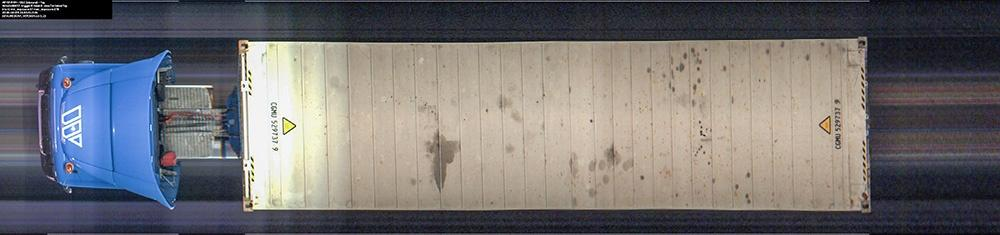

In [27]:
filename_saved = merge_images_horizontally([Image.open(im) for im in path_image])
display(Image.open(filename_saved))

In [32]:
import random
import socket, select
from random import randint
from time import gmtime, strftime

In [38]:
HOST = '127.0.0.1'
PORT = 9090

connected_clients_sockets = list()
server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
server_socket.bind((HOST, PORT))
server_socket.listen(10)
connected_clients_sockets.append(server_socket)

connected_clients_sockets


[<socket.socket fd=59, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 9090)>]

In [39]:
# imgcounter = 1
# basename = "image%s.png"
# while True:
#     read_sockets, write_sockets, error_sockets = select.select(connected_clients_sockets, [], [])
#     for sock in read_sockets:
#             if sock == server_socket:
#                 sockfd, client_address = server_socket.accept()
#                 connected_clients_sockets.append(sockfd)
#             else:
#                 try:
#                     data = sock.recv(4096)
#                     txt = str(data)
#                     if data:
#                         if data.startswith('SIZE'):
#                             tmp = txt.split()
#                             size = int(tmp[1])

#                             print('got size')

#                             sock.sendall("GOT SIZE")

#                         elif data.startswith('BYE'):
#                             sock.shutdown()

#                         else :

#                             myfile = open(basename % imgcounter, 'wb')
#                             myfile.write(data)

#                             data = sock.recv(40960000)
#                             if not data:
#                                 myfile.close()
#                                 break
#                             myfile.write(data)
#                             myfile.close()

#                             sock.sendall("GOT IMAGE")
#                             sock.shutdown()
#                 except:
#                     sock.close()
#                     connected_clients_sockets.remove(sock)
#                     continue
#             imgcounter += 1
#     server_socket.close()
         

KeyboardInterrupt: 

In [1]:
import random
import socket, select
from time import gmtime, strftime
from random import randint

In [2]:
HOST = '127.0.0.1'
PORT = 9090

sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server_address = (HOST, PORT)
sock.connect(server_address)

In [4]:
try:

    # open image
    myfile = open('images/Top1-w1000px-1.jpg', 'rb')
    bytes = myfile.read()
    size = len(bytes)
    
    # send image size to server
    sock.sendall(str.encode(f"SIZE {size}"))
    answer = sock.recv(4096)

    print('answer = %s' % answer)

    # # send image to server
    # if answer == 'GOT SIZE':
    #     sock.sendall(bytes)

    #     # check what server send
    #     answer = sock.recv(4096)
    #     print('answer = %s' % answer)

    #     if answer == 'GOT IMAGE' :
    #         sock.sendall("BYE BYE ")
    #         print('Image successfully send to server')

    myfile.close()

finally:
    sock.close()

OSError: [Errno 9] Bad file descriptor

In [ ]:
import random
import socket, select
from time import gmtime, strftime
from random import randint

image = "tux.png"

HOST = '127.0.0.1'
PORT = 6666

sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server_address = (HOST, PORT)
sock.connect(server_address)

try:

    # open image
    myfile = open(image, 'rb')
    bytes = myfile.read()
    size = len(bytes)

    # send image size to server
    sock.sendall("SIZE %s" % size)
    answer = sock.recv(4096)

    print 'answer = %s' % answer

    # send image to server
    if answer == 'GOT SIZE':
        sock.sendall(bytes)

        # check what server send
        answer = sock.recv(4096)
        print 'answer = %s' % answer

        if answer == 'GOT IMAGE' :
            sock.sendall("BYE BYE ")
            print 'Image successfully send to server'

    myfile.close()

finally:
    sock.close()

In [4]:
test = str.encode('SIZE 136183')
test.startswith(str.encode('SIZE'))

True

In [8]:
import cv2

In [9]:
img = cv2.imread('images/Left1-w1000px.jpg')
is_success, im_buf_arr = cv2.imencode(".jpg", img)
byte_im = im_buf_arr.tobytes()
byte_im

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00\xeb\x03\xe8\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\